In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score,roc_curve

In [2]:
df = pd.read_csv("dataset.csv")
data_severity = pd.read_csv("Symptom-severity.csv")
df.head()


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data_severity.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [4]:
for i in data_severity.index:
    print(data_severity['Symptom'][i], data_severity['weight'][i])

itching 1
skin_rash 3
nodal_skin_eruptions 4
continuous_sneezing 4
shivering 5
chills 3
joint_pain 3
stomach_pain 5
acidity 3
ulcers_on_tongue 4
muscle_wasting 3
vomiting 5
burning_micturition 6
spotting_urination 6
fatigue 4
weight_gain 3
anxiety 4
cold_hands_and_feets 5
mood_swings 3
weight_loss 3
restlessness 5
lethargy 2
patches_in_throat 6
irregular_sugar_level 5
cough 4
high_fever 7
sunken_eyes 3
breathlessness 4
sweating 3
dehydration 4
indigestion 5
headache 3
yellowish_skin 3
dark_urine 4
nausea 5
loss_of_appetite 4
pain_behind_the_eyes 4
back_pain 3
constipation 4
abdominal_pain 4
diarrhoea 6
mild_fever 5
yellow_urine 4
yellowing_of_eyes 4
acute_liver_failure 6
fluid_overload 6
swelling_of_stomach 7
swelled_lymph_nodes 6
malaise 6
blurred_and_distorted_vision 5
phlegm 5
throat_irritation 4
redness_of_eyes 5
sinus_pressure 4
runny_nose 5
congestion 5
chest_pain 7
weakness_in_limbs 7
fast_heart_rate 5
pain_during_bowel_movements 5
pain_in_anal_region 6
bloody_stool 5
irritation

In [5]:
data_dict=data_severity.set_index('Symptom').T.to_dict()
data_dict

C:\Users\meena\AppData\Local\Temp\ipykernel_26508\2881500295.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  data_dict=data_severity.set_index('Symptom').T.to_dict()


{'itching': {'weight': 1},
 'skin_rash': {'weight': 3},
 'nodal_skin_eruptions': {'weight': 4},
 'continuous_sneezing': {'weight': 4},
 'shivering': {'weight': 5},
 'chills': {'weight': 3},
 'joint_pain': {'weight': 3},
 'stomach_pain': {'weight': 5},
 'acidity': {'weight': 3},
 'ulcers_on_tongue': {'weight': 4},
 'muscle_wasting': {'weight': 3},
 'vomiting': {'weight': 5},
 'burning_micturition': {'weight': 6},
 'spotting_urination': {'weight': 6},
 'fatigue': {'weight': 4},
 'weight_gain': {'weight': 3},
 'anxiety': {'weight': 4},
 'cold_hands_and_feets': {'weight': 5},
 'mood_swings': {'weight': 3},
 'weight_loss': {'weight': 3},
 'restlessness': {'weight': 5},
 'lethargy': {'weight': 2},
 'patches_in_throat': {'weight': 6},
 'irregular_sugar_level': {'weight': 5},
 'cough': {'weight': 4},
 'high_fever': {'weight': 7},
 'sunken_eyes': {'weight': 3},
 'breathlessness': {'weight': 4},
 'sweating': {'weight': 3},
 'dehydration': {'weight': 4},
 'indigestion': {'weight': 5},
 'headache'

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [7]:
def remove_space_between_words(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].str.strip().str.replace(" ", "_")
    return df

In [8]:
df=remove_space_between_words(df)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal_infection,itching,skin_rash,nodal_skin_eruptions,dischromic__patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal_infection,skin_rash,nodal_skin_eruptions,dischromic__patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal_infection,itching,nodal_skin_eruptions,dischromic__patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal_infection,itching,skin_rash,dischromic__patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal_infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df[df['Disease']=='Acne'].values

array([['Acne', 'skin_rash', 'pus_filled_pimples', ..., nan, nan, nan],
       ['Acne', 'skin_rash', 'pus_filled_pimples', ..., nan, nan, nan],
       ['Acne', 'pus_filled_pimples', 'blackheads', ..., nan, nan, nan],
       ...,
       ['Acne', 'skin_rash', 'pus_filled_pimples', ..., nan, nan, nan],
       ['Acne', 'skin_rash', 'pus_filled_pimples', ..., nan, nan, nan],
       ['Acne', 'skin_rash', 'pus_filled_pimples', ..., nan, nan, nan]],
      dtype=object)

In [10]:
def encode_symptoms(df, data_severity):
    for i in data_severity.index:
        symptom = data_severity["Symptom"][i]
        weight = data_severity["weight"][i]
        df = df.replace(symptom, weight)

    # Replace missing values with 0
    df = df.fillna(0)

    # Additional hardcoded replacements
    df = df.replace("foul_smell_of_urine", 5)
    df = df.replace("dischromic__patches", 6)
    df = df.replace("spotting__urination", 6)
    
    return df

In [11]:
new_df = encode_symptoms(df, data_severity)

In [12]:
new_df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal_infection,1,3,4,6,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Fungal_infection,3,4,6,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Fungal_infection,1,4,6,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Fungal_infection,1,3,6,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Fungal_infection,1,3,4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
lb=LabelEncoder()
new_df['Disease']=lb.fit_transform(new_df['Disease'])
new_df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,15,1,3,4,6,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15,3,4,6,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15,1,4,6,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15,1,3,6,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15,1,3,4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
names = []

# Iterate through columns except for "Disease"
for col in new_df.columns:
    if col != "Disease":
        # Iterate through rows in the column
        for symptom in new_df[col]:
            # Check if the value is a string and not in the 'names' list
            if isinstance(symptom, str) and symptom not in names:
                names.append(symptom)

# Check if all symptoms have been replaced
all_replaced = all(symptom not in names for symptom in data_severity["Symptom"])

if all_replaced:
    print("All symptoms have been replaced.")
else:
    print("The following symptoms were not replaced:", names)

All symptoms have been replaced.


In [15]:
df=new_df
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,15,1,3,4,6,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15,3,4,6,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15,1,4,6,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15,1,3,6,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15,1,3,4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
x=df.drop('Disease',axis=1)
y=df['Disease']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3444, 17), (1476, 17), (3444,), (1476,))

# Probabilistic models 

# Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score,f1_score, confusion_matrix,precision_score, classification_report,roc_auc_score,roc_curve
from sklearn.tree import plot_tree
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rfc_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rfc_classifier.fit(X_train, Y_train)

# Predict disease labels on the testing data
Y_pred = rfc_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)

precision = precision_score(Y_test, Y_pred, average='macro')
recall = recall_score(Y_test, Y_pred,average='macro')
f1 = f1_score(Y_test, Y_pred, average='macro')
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Random Forest")
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(accuracy_score(Y_test, Y_pred, normalize=False))
print("Confusion matrix")
print(conf_matrix)

Random Forest
Accuracy: 0.991869918699187
Precision: 0.9928005598737307
Recall: 0.9909757027776227
F1-Score: 0.9914564591749411
976
Confusion matrix
[[18  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 34]]


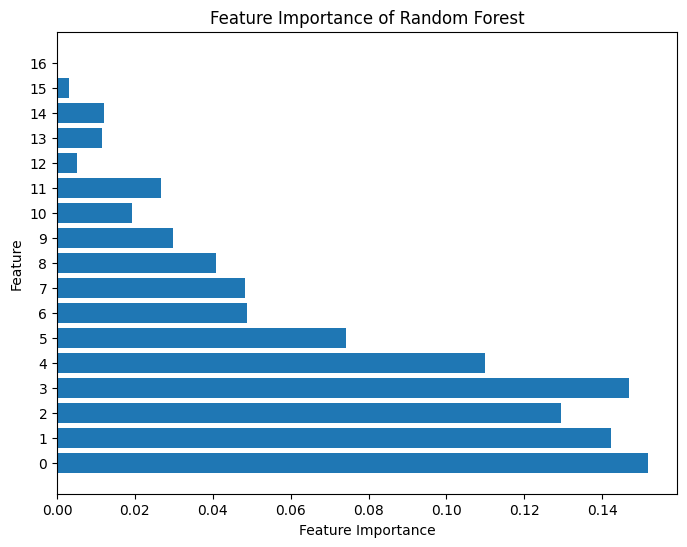

In [18]:

import matplotlib.pyplot as plt

feature_importances = rfc_classifier.feature_importances_
plt.figure(figsize=(8, 6))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(range(len(feature_importances)), range(len(feature_importances)))
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance of Random Forest')
plt.show()


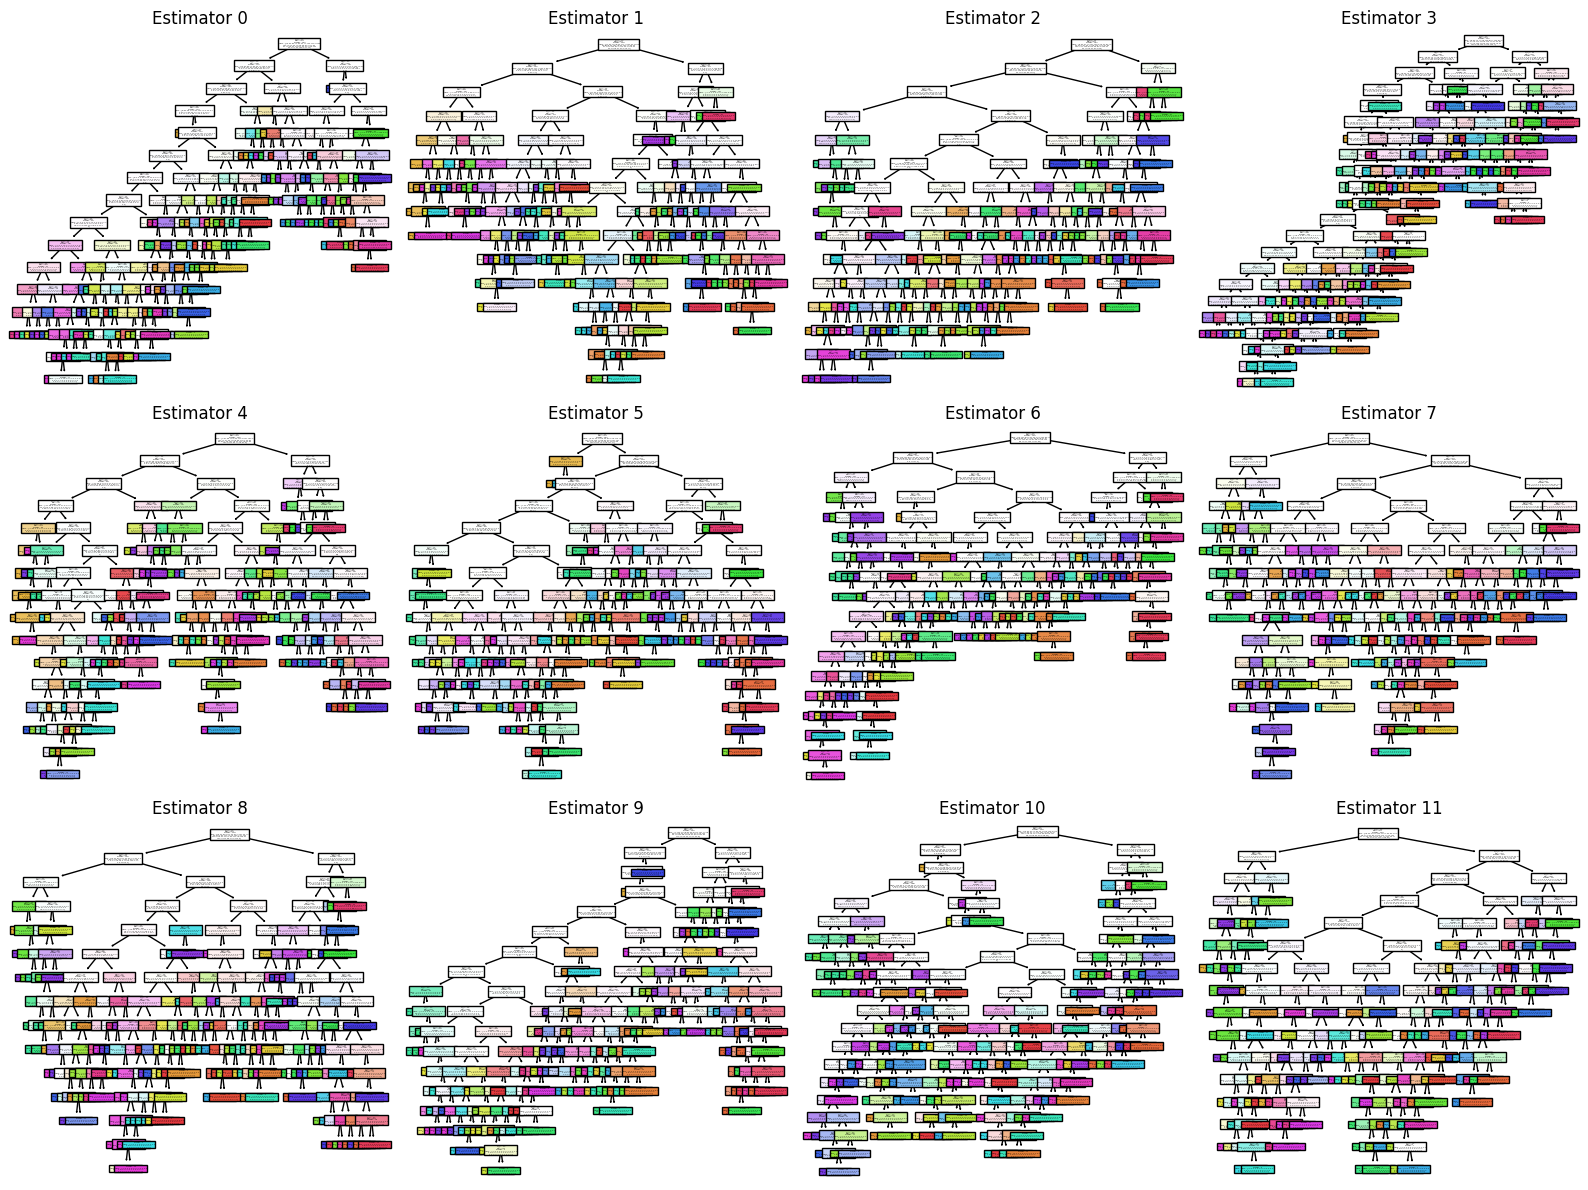

In [19]:
from sklearn.tree import plot_tree

plt.figure(figsize=(16, 12))
num_estimators_to_display = min(len(rfc_classifier.estimators_), 12)  # Limit to 12 or the total number of estimators
for index, estimator in enumerate(rfc_classifier.estimators_[:num_estimators_to_display]):
    plt.subplot(3, 4, index + 1)
    plot_tree(estimator, filled=True)
    plt.title(f"Estimator {index}")
plt.tight_layout()
plt.show()

# Naive Bayes

In [20]:
from sklearn.naive_bayes import MultinomialNB

# Instantiate the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the model
nb_classifier.fit(x_train, y_train)

# Make predictions
y_pred = nb_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.59



Confusion Matrix:
 [[18  0  0 ...  0  0  0]
 [ 0 35  0 ...  0  0  0]
 [ 0  0  0 ... 29  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0 18  0]
 [ 0  0  0 ...  0  0 28]]


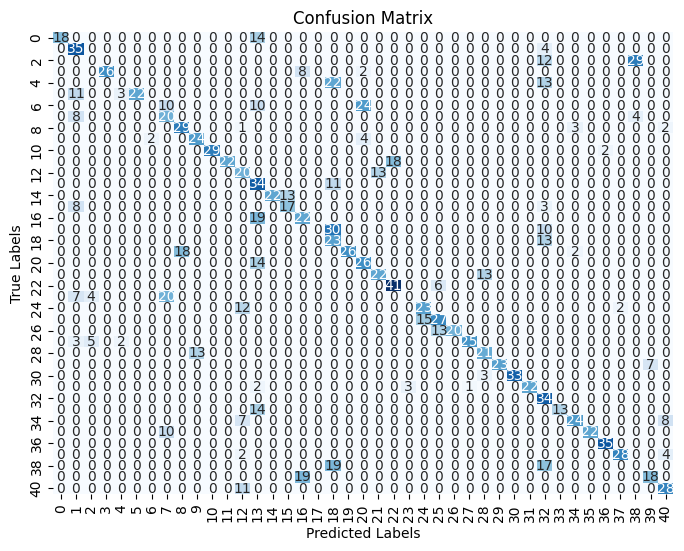

In [21]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming 'y_test' contains the true class labels and 'test_pred' contains the predicted labels
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("\nConfusion Matrix:\n", conf_matrix)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels, title, and axis ticks
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [22]:
# Classification report
class_report = classification_report(y_test, y_pred, zero_division=1)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.56      0.72        32
           1       0.49      0.90      0.63        39
           2       0.00      0.00      1.00        41
           3       1.00      0.72      0.84        36
           4       0.00      0.00      1.00        35
           5       1.00      0.61      0.76        36
           6       0.00      0.00      1.00        44
           7       0.33      0.62      0.43        32
           8       0.62      0.83      0.71        35
           9       0.65      0.80      0.72        30
          10       1.00      0.94      0.97        31
          11       1.00      0.55      0.71        40
          12       0.38      0.61      0.47        33
          13       0.32      0.76      0.45        45
          14       1.00      0.63      0.77        35
          15       0.57      0.61      0.59        28
          16       0.45      0.54      0.49        41
   

In [23]:
# Get probability estimates for each class
y_prob = nb_classifier.predict_proba(x_test)

In [24]:
# ROC-AUC score and curve
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')  # or 'ovo'
print(f"ROC-AUC Score: {roc_auc:.2f}")

ROC-AUC Score: 0.97


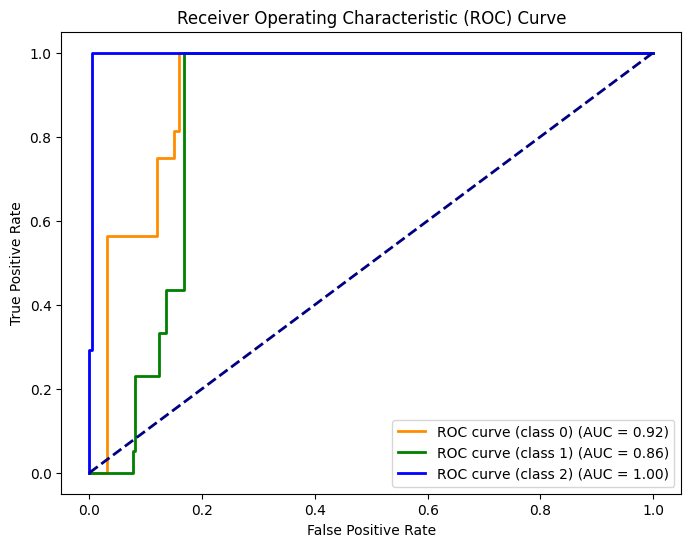

In [25]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Use OneVsRestClassifier for multiclass ROC
classifier = OneVsRestClassifier(MultinomialNB())
y_score = classifier.fit(x_train, y_train).predict_proba(x_test)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
colors = ['darkorange', 'green', 'blue']  # Add more colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


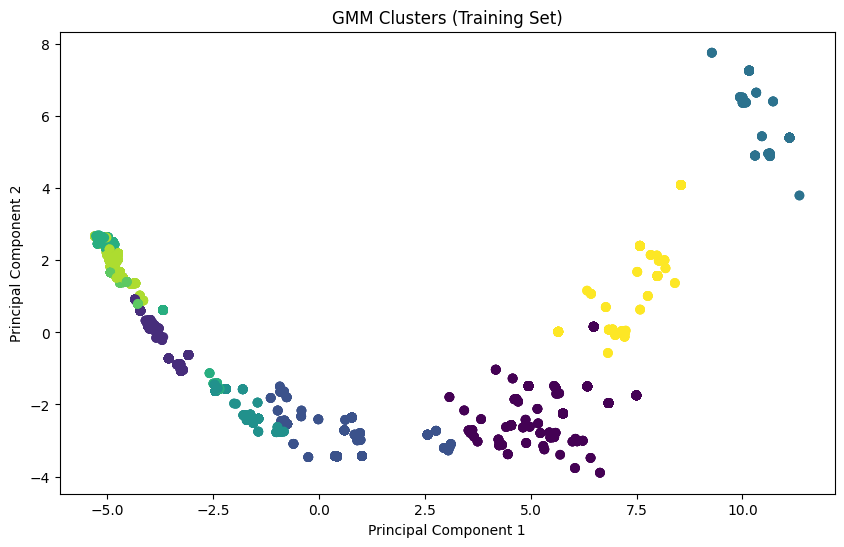

In [26]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import itertools

# Gaussian Mixture Model
n_components_range = range(2, 10)  # You can adjust the range based on your dataset
best_gmm = None
best_score = -1

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(x_train)

    # Use AIC (Akaike Information Criterion) as a criterion for the number of components
    score = gmm.aic(x_train)

    if best_gmm is None or score < best_score:
        best_score = score
        best_gmm = gmm

# Visualize clusters using PCA
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Plot training set clusters
plt.figure(figsize=(10, 6))
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=best_gmm.predict(x_train), cmap='viridis')
plt.title('GMM Clusters (Training Set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


C:\Users\meena\AppData\Local\Temp\ipykernel_26508\1288222969.py:27: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ell = Ellipse(gmm.means_[n, :2], v[0], v[1], 180.0 + angle, color='black', alpha=0.3)


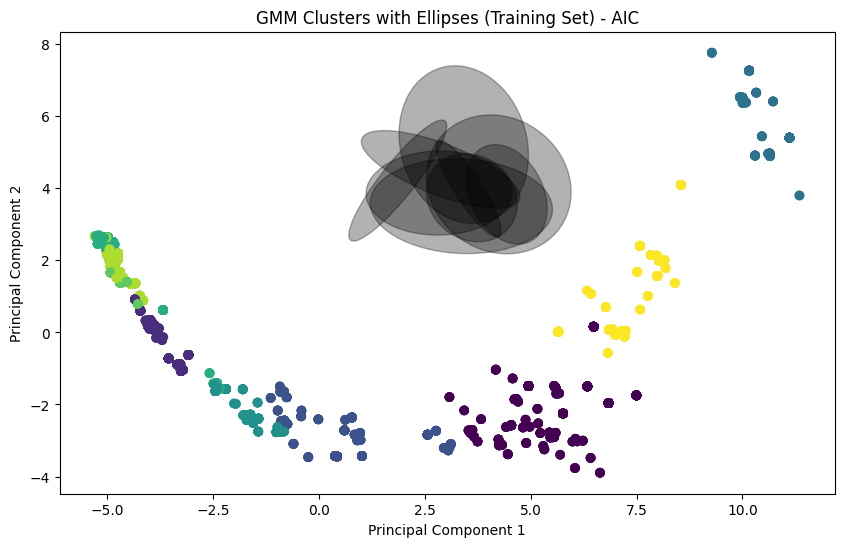

In [27]:
from matplotlib.patches import Ellipse
# Gaussian Mixture Model
n_components_range = range(2, 10)
best_gmm_aic = None
best_aic = float('inf')

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(x_train)

    # Use AIC (Akaike Information Criterion) as a criterion for the number of components
    aic_score = gmm.aic(x_train)

    # Update best model based on AIC
    if aic_score < best_aic:
        best_aic = aic_score
        best_gmm_aic = gmm

def plot_gmm_ellipses(gmm, ax):
    for n in range(gmm.n_components):
        covariances = gmm.covariances_[n][:2, :2]  # Consider only the first two dimensions
        v, w = np.linalg.eigh(covariances)
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan(u[1] / u[0])
        angle = 180.0 * angle / np.pi
        ell = Ellipse(gmm.means_[n, :2], v[0], v[1], 180.0 + angle, color='black', alpha=0.3)
        ax.add_patch(ell)

# Plot training set clusters with ellipses
plt.figure(figsize=(10, 6))
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=best_gmm_aic.predict(x_train), cmap='viridis')
plot_gmm_ellipses(best_gmm_aic, plt.gca())
plt.title('GMM Clusters with Ellipses (Training Set) - AIC')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [28]:
# Hyperparameter Tuning is not applicable for GMM

# Evaluation and Performance Metrics
train_pred = best_gmm.predict(x_train)
test_pred = best_gmm.predict(x_test)

train_silhouette_score = silhouette_score(x_train, train_pred)
test_silhouette_score = silhouette_score(x_test, test_pred)

print(f'Training Silhouette Score: {train_silhouette_score}')
print(f'Test Silhouette Score: {test_silhouette_score}')

Training Silhouette Score: 0.2759371192848332
Test Silhouette Score: 0.26414888672640763


In [29]:
# Performance Metrics
print("Training Accuracy:", accuracy_score(y_train, train_pred))
print("Test Accuracy:", accuracy_score(y_test, test_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, test_pred))
print("\nClassification Report:\n", classification_report(y_test, test_pred, zero_division=1))  # Use zero_division parameter


Training Accuracy: 0.008710801393728223
Test Accuracy: 0.008130081300813009

Confusion Matrix:
 [[ 0 12  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0 18 ...  0  0  0]
 [39  0  0 ...  0  0  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      1.00        32
           1       0.00      0.00      1.00        39
           2       0.00      0.00      1.00        41
           3       0.00      0.00      1.00        36
           4       0.00      0.00      1.00        35
           5       0.00      0.00      1.00        36
           6       0.00      0.00      1.00        44
           7       0.05      0.38      0.09        32
           8       0.00      0.00      1.00        35
           9       1.00      0.00      0.00        30
          10       1.00      0.00      0.00        31
          11       1.00      0.00      0.00        40
          12       1

In [30]:
from hmmlearn.base import ConvergenceMonitor
from sklearn.model_selection import KFold
from hmmlearn import hmm

# Assuming x_train is your training data
kf = KFold(n_splits=5, shuffle=True, random_state=42)

best_num_states = None
best_score = float('-inf')

for num_states in range(2, 6):  # Try different values
    scores = []
    for train_index, val_index in kf.split(x_train):
        train_data, val_data = x_train.iloc[train_index], x_train.iloc[val_index]

        model = hmm.GaussianHMM(n_components=num_states, covariance_type="full", n_iter=200)
        model.fit(train_data)

        scores.append(model.score(val_data))

    avg_score = sum(scores) / len(scores)
    if avg_score > best_score:
        best_score = avg_score
        best_num_states = num_states

print(f"Best number of states: {best_num_states}")


Model is not converging.  Current: 27079.65497522083 is not greater than 38977.1692449907. Delta is -11897.514269769868
Model is not converging.  Current: 81890.74891596033 is not greater than 81890.74891625645. Delta is -2.9611692298203707e-07
Model is not converging.  Current: 54497.87449002417 is not greater than 59548.20082681659. Delta is -5050.3263367924155
Model is not converging.  Current: 112010.45689237429 is not greater than 146874.74364678338. Delta is -34864.286754409084
Model is not converging.  Current: 105914.38843054743 is not greater than 105914.38856007073. Delta is -0.0001295232941629365
Model is not converging.  Current: 114224.97868373562 is not greater than 127065.37680421623. Delta is -12840.398120480604
Model is not converging.  Current: 114459.51694601362 is not greater than 132467.53647777383. Delta is -18008.019531760205
Model is not converging.  Current: 46335.18703915897 is not greater than 94805.52173712714. Delta is -48470.334697968174
Model is not conve

Best number of states: 5


# Hidden Markov Model

In [31]:
from hmmlearn import hmm
print(num_states)
model = hmm.GaussianHMM(n_components=num_states, covariance_type="full", n_iter=200)
model.fit(x_train)


5


GaussianHMM(covariance_type='full', n_components=5, n_iter=200)

In [32]:
# Assuming x_test is your test data
hidden_states = model.predict(x_test)
print(hidden_states)

[4 2 1 ... 4 1 1]


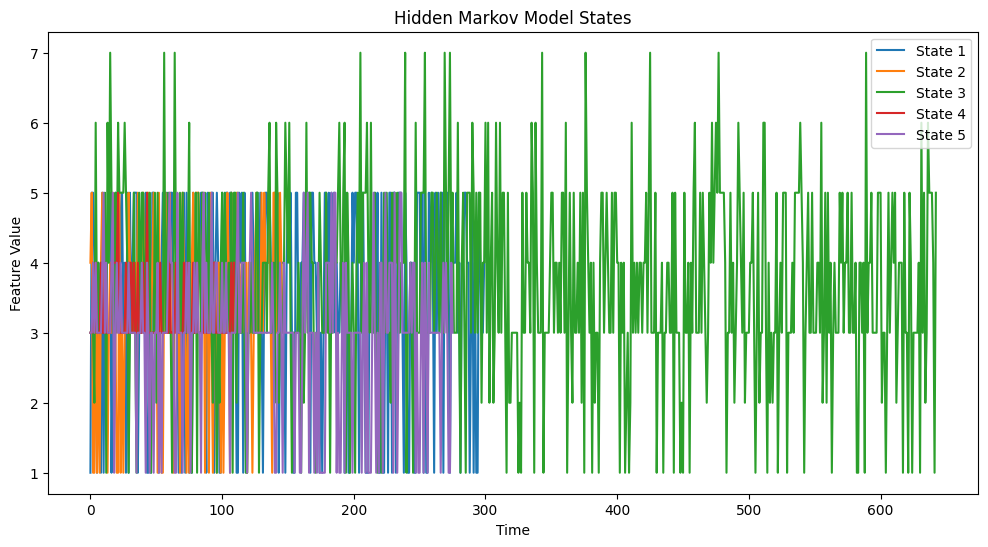

In [33]:

# Plot the hidden states over time
plt.figure(figsize=(12, 6))
for i in range(num_states):
    state_samples = x_test[hidden_states == i]
    state_samples = state_samples.values if isinstance(state_samples, pd.DataFrame) else state_samples
    plt.plot(state_samples[:, 0], label=f'State {i + 1}')

plt.title('Hidden Markov Model States')
plt.xlabel('Time')
plt.ylabel('Feature Value')
plt.legend()
plt.show()

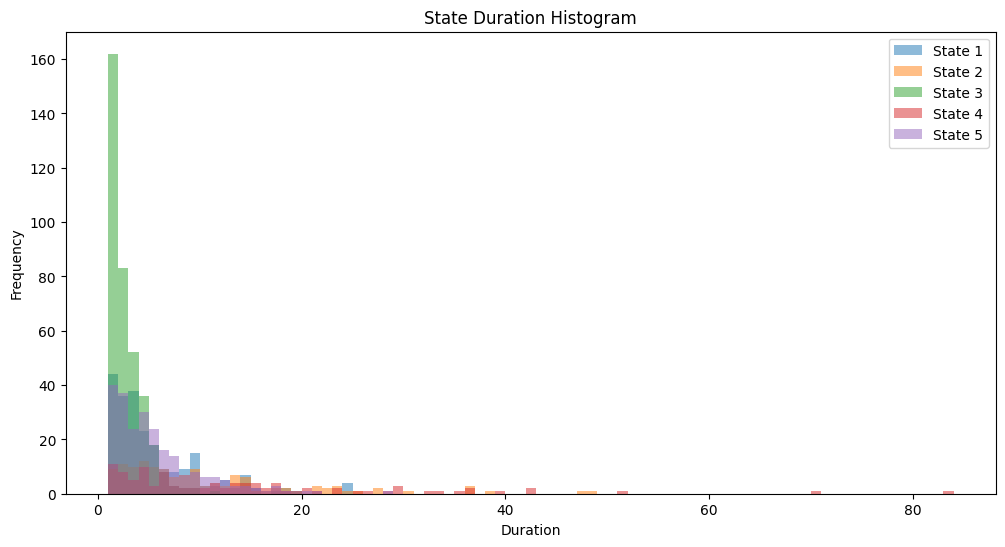

In [34]:
plt.figure(figsize=(12, 6))
for i in range(num_states):
    state_durations = np.diff(np.where(np.concatenate(([True], hidden_states == i, [True])))[0]) - 1
    plt.hist(state_durations, bins=range(1, max(state_durations) + 1), alpha=0.5, label=f'State {i + 1}')

plt.title('State Duration Histogram')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.legend()
plt.show()


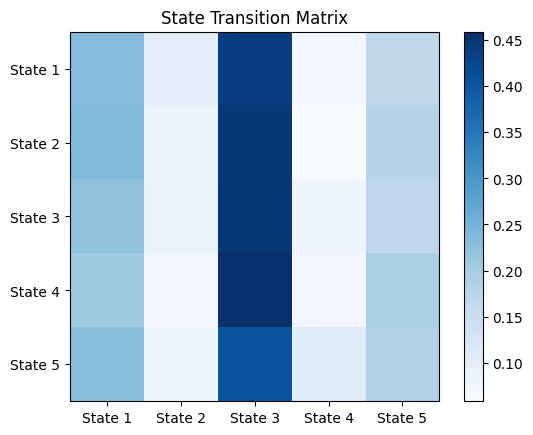

In [35]:
plt.imshow(model.transmat_, interpolation='nearest', cmap='Blues')
plt.title('State Transition Matrix')
plt.colorbar()
plt.xticks(range(num_states), [f'State {i + 1}' for i in range(num_states)])
plt.yticks(range(num_states), [f'State {i + 1}' for i in range(num_states)])
plt.show()


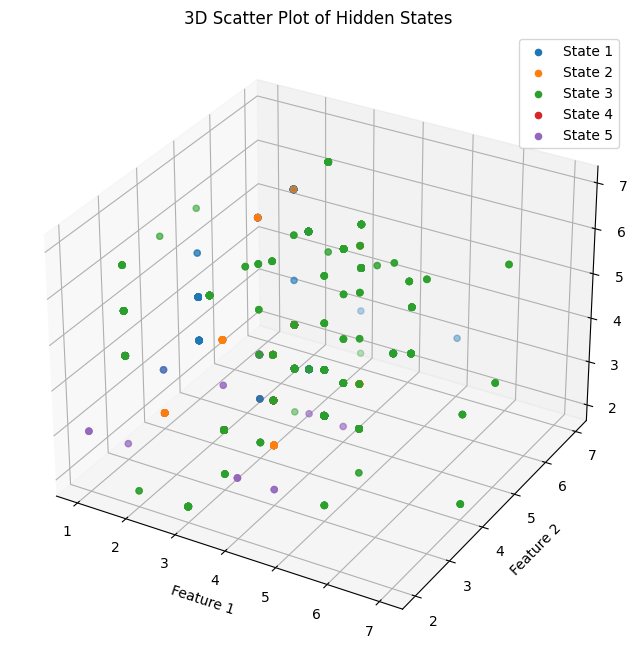

In [36]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(num_states):
    state_samples = x_test[hidden_states == i]
    ax.scatter(state_samples.iloc[:, 0], state_samples.iloc[:, 1], state_samples.iloc[:, 2], label=f'State {i + 1}')

ax.set_title('3D Scatter Plot of Hidden States')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.legend()
plt.show()
